<a href="https://colab.research.google.com/github/Prashasticodes/Cancer-Regression-/blob/main/breast%20%20cancer%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
cancer_data = load_breast_cancer()
data = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Note: The dataset does not contain a direct regression target, so for demonstration, we can create a target
# For example, we could use the mean radius as a target for a regression task
# Here, we assume that we're predicting the mean radius as a continuous target variable
data['target'] = cancer_data.target  # This is typically a classification target (0 or 1)

# Step 2: Feature selection
features = data.columns[:-1]  # All columns except the target
X = data[features]  # Features
y = data['target']  # Target variable

# Step 3: Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

# Step 6: Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate accuracy percentage
accuracy_percentage = r2 * 100
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')

# Optional: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
print("\nFeature Importances:")
print(feature_importance_df.sort_values(by='importance', ascending=False))





Mean Squared Error: 0.03276140350877193
R-squared: 0.8605413691451032
Accuracy Percentage: 86.05%

Feature Importances:
                    feature  importance
27     worst concave points    0.269936
7       mean concave points    0.202781
22          worst perimeter    0.158947
23               worst area    0.118171
20             worst radius    0.103470
21            worst texture    0.025475
1              mean texture    0.021067
26          worst concavity    0.011771
13               area error    0.010239
24         worst smoothness    0.008456
4           mean smoothness    0.006652
16          concavity error    0.006587
19  fractal dimension error    0.005278
3                 mean area    0.005143
6            mean concavity    0.004656
28           worst symmetry    0.004215
12          perimeter error    0.003913
11            texture error    0.003764
10             radius error    0.003696
18           symmetry error    0.003541
14         smoothness error    0.003475


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset
cancer_data = load_breast_cancer()
data = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Define a continuous target (using 'mean radius' as an example)
data['target'] = data['mean radius']

# Step 2: Feature selection (removing the current target column)
features = data.columns[:-1]
X = data[features]
y = data['target']

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Dimensionality reduction using PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_reduced = pca.fit_transform(X_scaled)

# Step 4: Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model.__class__.__name__}:')
    print(f'  Mean Squared Error: {mse:.4f}')
    print(f'  R-squared: {r2:.4f}')
    print(f'  Accuracy Percentage: {r2 * 100:.2f}%\n')
    return mse, r2

# Step 5: Model Training and Evaluation
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mse, rf_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_mse, gb_r2 = evaluate_model(gb_model, X_train, X_test, y_train, y_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_mse, xgb_r2 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# LightGBM
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
lgbm_mse, lgbm_r2 = evaluate_model(lgbm_model, X_train, X_test, y_train, y_test)

# Step 6: Hyperparameter tuning (Example for Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='r2',
                              n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best RF model
print("Best Random Forest Model after GridSearchCV:")
rf_mse, rf_r2 = evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

# Optional: Feature Importances from PCA Components (for models supporting it)
importances = best_rf_model.feature_importances_
print("Feature Importances (Reduced Dimensions):")
for i, imp in enumerate(importances):
    print(f'PCA Component {i + 1}: {imp:.4f}')


RandomForestRegressor:
  Mean Squared Error: 0.6048
  R-squared: 0.9500
  Accuracy Percentage: 95.00%

GradientBoostingRegressor:
  Mean Squared Error: 0.3326
  R-squared: 0.9725
  Accuracy Percentage: 97.25%

XGBRegressor:
  Mean Squared Error: 0.6806
  R-squared: 0.9437
  Accuracy Percentage: 94.37%

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 10
[LightGBM] [Info] Start training from score 14.117635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga


Visualizing Feature Importances (Random Forest):


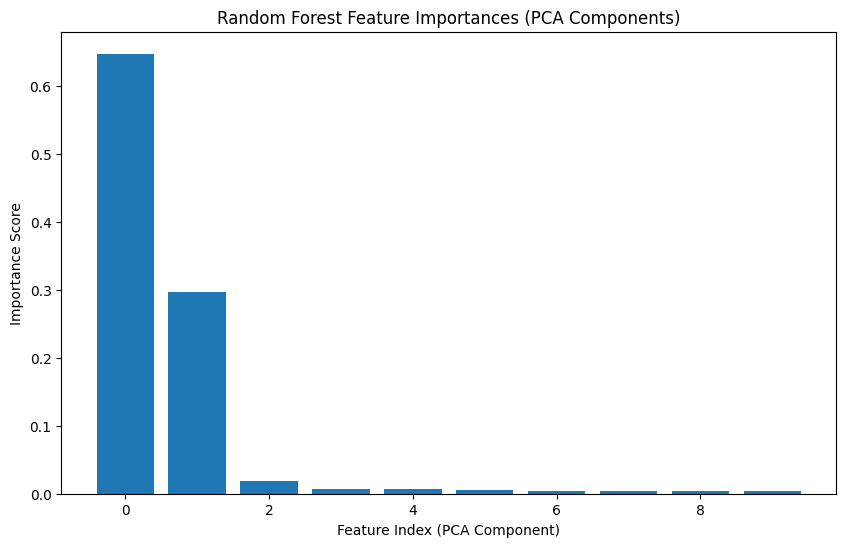


Residual Plot (Random Forest):


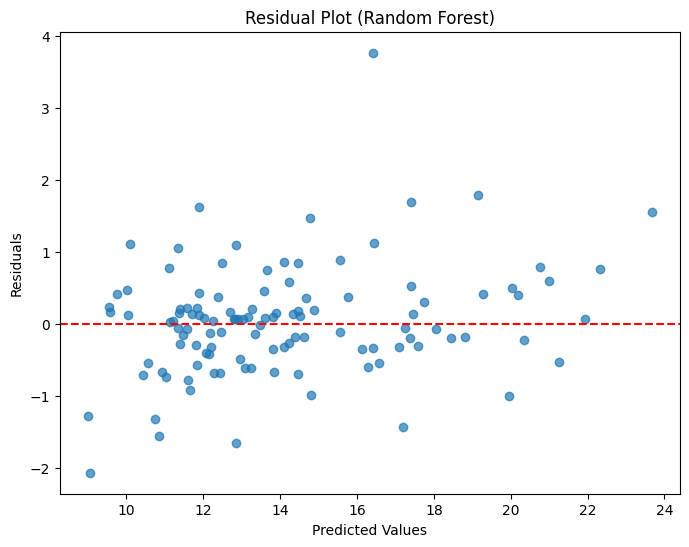

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 10
[LightGBM] [Info] Start training from score 14.117635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

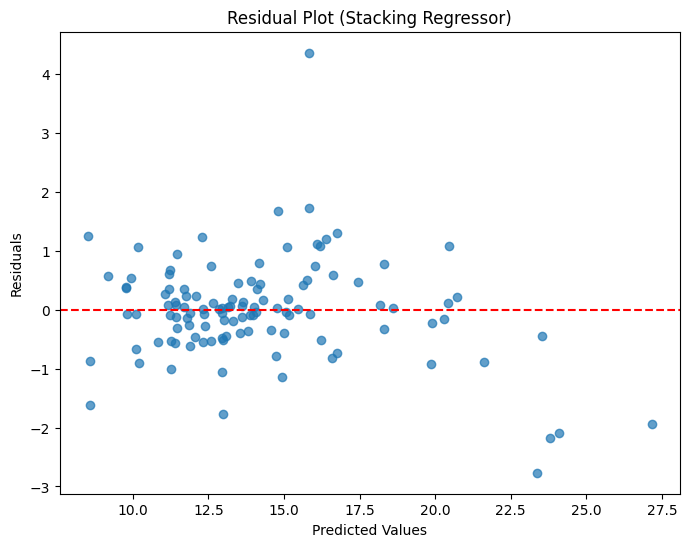

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import StackingRegressor

# Visualize Feature Importances
def plot_feature_importances(importances, title):
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.title(title)
    plt.xlabel("Feature Index (PCA Component)")
    plt.ylabel("Importance Score")
    plt.show()

# Plot feature importances for the best Random Forest model
print("\nVisualizing Feature Importances (Random Forest):")
plot_feature_importances(best_rf_model.feature_importances_, "Random Forest Feature Importances (PCA Components)")

# Residual Plot Function
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(title)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

# Plot residuals for the best Random Forest model
print("\nResidual Plot (Random Forest):")
plot_residuals(y_test, best_rf_model.predict(X_test), "Residual Plot (Random Forest)")

# Stacking Regressor: Combine Multiple Models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=200, random_state=42)
)

# Train Stacking Model
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate Stacking Model
print("\nEvaluating Stacking Regressor:")
stacking_mse = mean_squared_error(y_test, y_pred_stacking)
stacking_r2 = r2_score(y_test, y_pred_stacking)
print(f'  Mean Squared Error: {stacking_mse:.4f}')
print(f'  R-squared: {stacking_r2:.4f}')
print(f'  Accuracy Percentage: {stacking_r2 * 100:.2f}%')

# Residual Plot for Stacking Regressor
print("\nResidual Plot (Stacking Regressor):")
plot_residuals(y_test, y_pred_stacking, "Residual Plot (Stacking Regressor)")
